In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 19s (501 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [1]:
import pandas as pd
import yfinance as yf

samsung_df = yf.download('005930.KS', start='2023-01-01', end='2023-05-30', progress=False)
samsung_df = samsung_df[["Close"]]
samsung_df = samsung_df.reset_index()
samsung_df.columns = ['day', 'price']
samsung_df['day'] = pd.to_datetime(samsung_df['day'])
samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df.to_csv('samsung_stock_price.csv')

In [2]:
import os
os.chdir('/content/drive/MyDrive/kisco/Data')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 주식 가격 데이터 로드
data = pd.read_csv('samsung_stock_price.csv', parse_dates=['day'], index_col='day')

data.index = pd.date_range(start=data.index[0], periods=len(data), freq='B')

# 데이터 분할: 훈련 세트와 테스트 세트
train_data = data.loc['2023-01-02':'2023-05-15']
test_data = data.loc['2023-05-16':]

In [7]:
# ARIMA 모델 훈련
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

2023-05-16    68582.075239
2023-05-17    68655.260226
2023-05-18    68720.517940
2023-05-19    68778.707047
Freq: B, Name: predicted_mean, dtype: float64


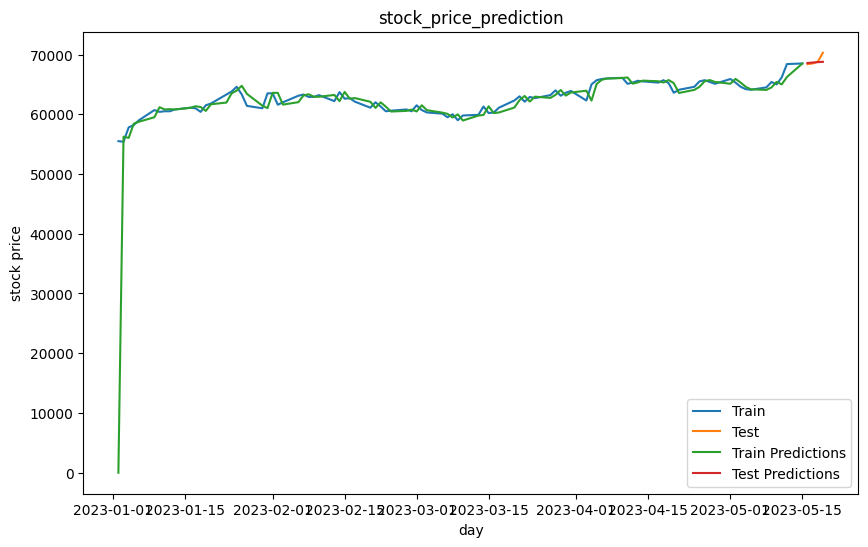

In [8]:
# 훈련 세트에 대한 예측
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# 테스트 세트에 대한 예측
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

print(test_predictions)
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(train_predictions, label='Train Predictions')
plt.plot(test_predictions, label='Test Predictions')
plt.title('stock_price_prediction')
plt.xlabel('day')
plt.ylabel('stock price')
plt.legend()
plt.show()


In [16]:
import itertools
p=d=q=range(1,3)
pdq = list(itertools.product(p,d,q))

for param in pdq:
  try:
    model = ARIMA(train_data, order=param)
    model_fit = model.fit()
    print(param, model_fit.aic)#모형의 적합도 => 낮을수록 좋음
  except:
    continue

(1, 1, 1) 1565.7690597707488
(1, 1, 2) 1564.8173430327267
(1, 2, 1) 1609.006404424824


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 2, 2) 1611.038136418765
(2, 1, 1) 1564.6510918983386
(2, 1, 2) 1566.2821919637843


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 1) 1606.147722293285
(2, 2, 2) 1613.1005652566678


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
model2 = ARIMA(train_data, order=(1, 1, 2))
model2_fit = model2.fit()

2023-05-16    68679.491431
2023-05-17    68816.593683
2023-05-18    68918.373153
2023-05-19    68993.930340
Freq: B, Name: predicted_mean, dtype: float64


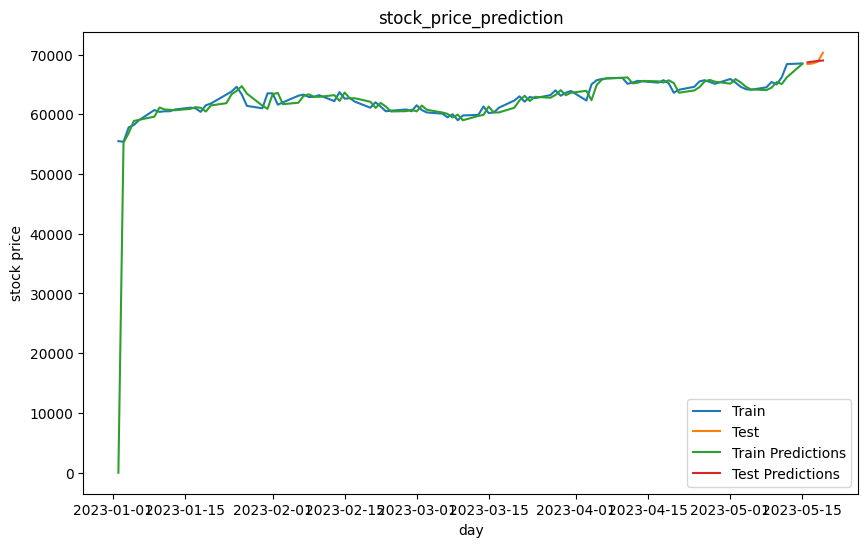

In [18]:
# 훈련 세트에 대한 예측
train_predictions2 = model2_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# 테스트 세트에 대한 예측
test_predictions2 = model2_fit.predict(start=test_data.index[0], end=test_data.index[-1])

print(test_predictions2)
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(train_predictions2, label='Train Predictions')
plt.plot(test_predictions2, label='Test Predictions')
plt.title('stock_price_prediction')
plt.xlabel('day')
plt.ylabel('stock price')
plt.legend()
plt.show()
